In [1]:
import tensorflow as tf # Importing TensorFlow and Keras for building and training the CNN model
from tensorflow import keras # Importing TensorFlow and Keras for building and training the CNN model

import cv2 # Importing OpenCV for image processing functions and computer vision

import numpy as np # Importing numpy for numerical operations on arrays (e.g., image data)

import os # Importing os to interact with the operating system (e.g., for file handling)

import matplotlib.pyplot as plt # Importing matplotlib to visualize images and model performance

In [5]:
# Initialize empty lists to store image data and labels
images = []
labels = []

# Iterate over each folder in the 'train' directory, each representing a different label/class
for label in os.listdir('train'):
    label_path = os.path.join('train', label)
    if os.path.isdir(label_path):
        # Iterate over each image file in the label folder
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            if image_file.endswith(('.png', '.jpg', '.jpeg')):
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (64, 64))
                images.append(image)
                labels.append(label)

# Convert lists of images and labels to numpy arrays for easier manipulation
x_train = np.array(images)
y_train = np.array(labels)

In [6]:
x_train.shape #for finding the size of training sample and its dimensions

(19402, 64, 64, 3)

In [7]:
y_train.shape

(19402,)

In [8]:
# Shuffle the training data and labels together to randomize their order
# This helps improve training by preventing the model from learning any unintended order in the dataset
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train) 

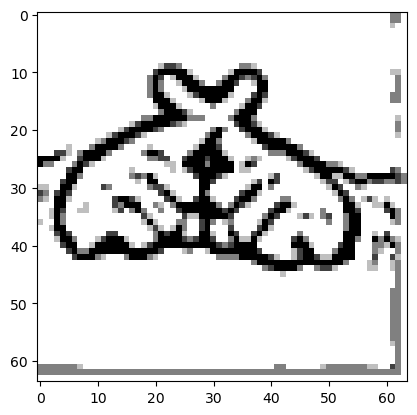

In [14]:
plt.imshow(x_train[0])

In [15]:
y_train[0]

'x'

In [9]:
# same process for testing dataset
images = []
labels = []

# Iterate over each label folder
for label in os.listdir('test'):
    label_path = os.path.join('test', label)
    if os.path.isdir(label_path):
        # Iterate over each image file in the label folder
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            if image_file.endswith(('.png', '.jpg', '.jpeg')):
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (64, 64))
                images.append(image)
                labels.append(label)

# Convert lists to numpy arrays
x_test = np.array(images)
y_test = np.array(labels)
from sklearn.utils import shuffle
x_test, y_test = shuffle(x_test, y_test)

In [10]:
x_test.shape

(4870, 64, 64, 3)

In [11]:
# Normalize pixel values to be between 0 and 1 by dividing by 255
# This helps the model train more effectively by standardizing the input range
x_train = x_train/255
x_test = x_test/255

In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

# This converts categorical labels (e.g., 'A', 'B', 'C') into one-hot encoded arrays
# Fit and transform labels
lb.fit(y_train)
y_trainnew = lb.transform(y_train)
lb.fit(y_test)
y_testnew = lb.transform(y_test)

In [16]:
y_trainnew[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [13]:
# Define a Sequential CNN model

cnn = keras.models.Sequential([
    # First Convolutional Layer: 32 filters, 3x3 kernel, ReLU activation
    # The input shape is 64x64 RGB images
    keras.layers.Conv2D(filters=32 , kernel_size =(3,3), activation = 'relu' , input_shape= (64,64,3)),
    keras.layers.MaxPooling2D((2,2)), # Max Pooling Layer: Reduces the spatial dimensions by a factor of 2x2

    # Second Convolutional Layer: 64 filters, 3x3 kernel, ReLU activation
    keras.layers.Conv2D(filters=64 , kernel_size =(3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(36,activation='softmax'), # Output Layer with 36 neurons (for 36 classes) and softmax activation for multi-class classification
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#compile the CNN model
cnn.compile(optimizer='adam',  # Adam optimizer, a popular choice for deep learning, adapts the learning rate during training
           loss='categorical_crossentropy', # Categorical crossentropy loss function, appropriate for multi-class classification
            metrics=['accuracy']) # Track accuracy as the evaluation metric during training

In [18]:
cnn.fit(x_train,y_trainnew,epochs=4)

Epoch 1/4
607/607 ━━━━━━━━━━━━━━━━━━━━ 75s 115ms/step - accuracy: 0.8017 - loss: 0.8231
Epoch 2/4
607/607 ━━━━━━━━━━━━━━━━━━━━ 68s 111ms/step - accuracy: 0.9989 - loss: 0.0055
Epoch 3/4
607/607 ━━━━━━━━━━━━━━━━━━━━ 85s 115ms/step - accuracy: 0.9996 - loss: 0.0027
Epoch 4/4
607/607 ━━━━━━━━━━━━━━━━━━━━ 70s 116ms/step - accuracy: 0.9985 - loss: 0.0037


In [34]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,473,838 (9.44 MB)

 Trainable params: 824,612 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,649,226 (6.29 MB)

In [19]:
cnn.evaluate(x_test,y_testnew)

153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9978 - loss: 0.0242


[0.04025343433022499, 0.996303915977478]

In [26]:
img = cv2.imread('1.jpg')
classes = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',]
img = cv2.Canny(img,140,140)
img=cv2.dilate(img,(9,9),iterations=2)
img = cv2.flip(img, 1)
img=255-img
img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
img = cv2.resize(img, (64, 64))
x = np.array(img)
x = np.expand_dims(x,axis=0)
x = x/255
y_pred =  cnn.predict(x)
ans = classes[np.argmax(y_pred)] #argmax returns the index of the maximum element present in the list

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [27]:
print(ans)

1


In [28]:
y_pred

array([[2.7405681e-06, 9.1219479e-01, 6.1944023e-02, 3.3708650e-03,
        1.0524389e-04, 3.2359696e-06, 1.9154118e-08, 1.1571302e-05,
        9.0120535e-05, 2.1336737e-07, 4.5066972e-06, 2.9094436e-09,
        1.0160518e-04, 1.9487060e-04, 9.8385854e-08, 7.9806279e-07,
        1.8006007e-04, 1.5463021e-04, 1.1944742e-05, 4.8776440e-04,
        1.5532263e-04, 6.1747785e-05, 5.5465767e-07, 6.1056879e-04,
        2.1779802e-05, 1.0573644e-04, 2.3235621e-04, 3.0848302e-03,
        6.8516172e-03, 5.0272056e-06, 4.6562199e-08, 4.6967607e-06,
        1.3830011e-06, 5.2526878e-04, 9.4790990e-03, 9.8476949e-07]],
      dtype=float32)

In [29]:
np.argmax(y_pred)

1

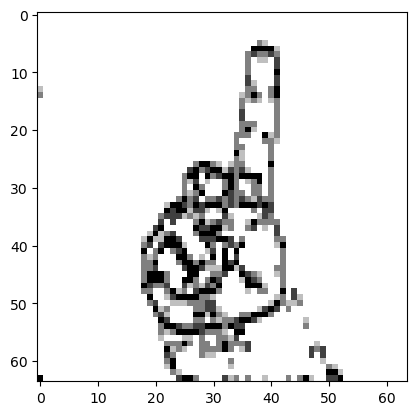

In [30]:
plt.imshow(img)

In [31]:
import joblib 

In [33]:
joblib.dump(cnn,'isl_model')
# Save the trained CNN model to a file using joblib
# The model will be saved as 'isl_model' for later use or deployment

['isl_model']